Importing the Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
import catboost

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Collection and Processing

In [ ]:
car_dataset = pd.read_csv('/content/drive/MyDrive/Datasets/datasets/car data.csv')

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
car_dataset.shape

(301, 9)

In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the Categorical Data

In [ ]:

car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)


car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data and Target

In [ ]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [ ]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

Model Training

1. Linear Regression

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
mean_error = mean_absolute_error(Y_train, training_data_prediction)
print("R squared Error : ", error_score)
print("mean absolute error :", mean_error)

R squared Error :  0.8799451660493711
mean absolute error : 1.2166174093911273


Visualize the actual prices and Predicted prices

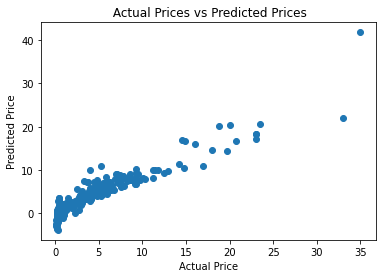

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction = lin_reg_model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


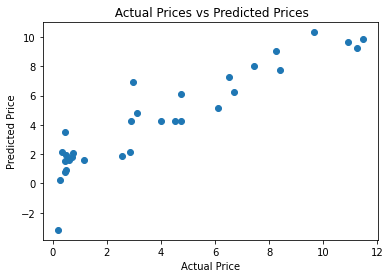

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_regression = RandomForestRegressor(random_state=0)
forest_regression.fit(X_train,Y_train)

RandomForestRegressor(random_state=0)

In [ ]:
training_data_prediction2 = forest_regression.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction2)
mean_error = mean_absolute_error(Y_train, training_data_prediction2)
print("R squared Error : ", error_score)
print("mean absolute error :", mean_error)

R squared Error :  0.9863907462881809
mean absolute error : 0.24258444444444438


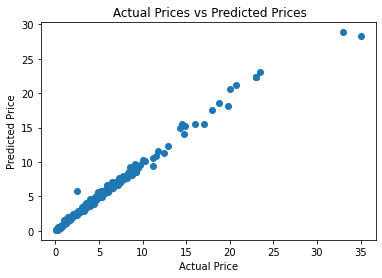

In [ ]:
plt.scatter(Y_train, training_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction2 = forest_regression.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction2)
print("R squared Error : ", error_score)

R squared Error :  0.982225343443489


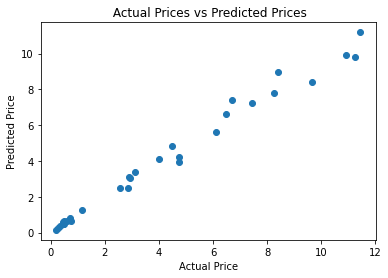

In [ ]:
plt.scatter(Y_test, test_data_prediction2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

3.Extra tree Regession

In [ ]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,Y_train)

ExtraTreesRegressor(n_estimators=120)

In [ ]:
training_data_prediction3=ET_Model.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction3)
mean_error = mean_absolute_error(Y_train, training_data_prediction3)
print("R squared Error : ", error_score)
print("mean absolute error :", mean_error)

R squared Error :  1.0
mean absolute error : 3.2159974272116397e-15


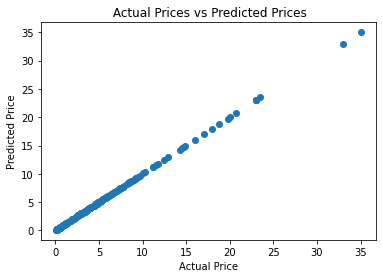

In [ ]:
plt.scatter(Y_train, training_data_prediction3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction3 = ET_Model.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction3)
print("R squared Error : ", error_score)

R squared Error :  0.9762533795635617


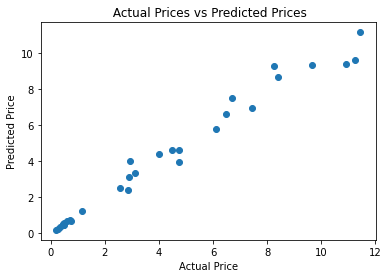

In [ ]:
plt.scatter(Y_test, test_data_prediction3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

4.Cat boost Regressor

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat_boost=CatBoostRegressor()
cat_boost.fit(X_train,Y_train)

Learning rate set to 0.033292
0:	learn: 5.1107185	total: 1.28ms	remaining: 1.28s
1:	learn: 5.0064919	total: 1.76ms	remaining: 878ms
2:	learn: 4.9162338	total: 2.44ms	remaining: 809ms
3:	learn: 4.8107186	total: 3.03ms	remaining: 756ms
4:	learn: 4.7208788	total: 3.35ms	remaining: 667ms
5:	learn: 4.6343908	total: 3.93ms	remaining: 651ms
6:	learn: 4.5565079	total: 4.56ms	remaining: 647ms
7:	learn: 4.4783517	total: 5.39ms	remaining: 669ms
8:	learn: 4.3896009	total: 5.89ms	remaining: 648ms
9:	learn: 4.2999965	total: 6.61ms	remaining: 654ms
10:	learn: 4.2189395	total: 7.19ms	remaining: 646ms
11:	learn: 4.1361729	total: 7.63ms	remaining: 628ms
12:	learn: 4.0603857	total: 8.08ms	remaining: 614ms
13:	learn: 3.9838325	total: 8.5ms	remaining: 599ms
14:	learn: 3.9115560	total: 9.03ms	remaining: 593ms
15:	learn: 3.8463908	total: 9.93ms	remaining: 611ms
16:	learn: 3.7790425	total: 10.8ms	remaining: 627ms
17:	learn: 3.7176391	total: 11.8ms	remaining: 641ms
18:	learn: 3.6607308	total: 12.3ms	remaining:

In [ ]:
training_data_prediction4=cat_boost.predict(X_train)

In [ ]:
error_score = metrics.r2_score(Y_train, training_data_prediction4)
mean_error = mean_absolute_error(Y_train, training_data_prediction4)
print("R squared Error : ", error_score)
print("mean absolute error :", mean_error)

R squared Error :  0.9983846453957772
mean absolute error : 0.15758893725001027


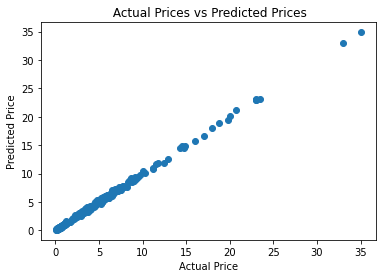

In [ ]:
plt.scatter(Y_train, training_data_prediction4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
test_data_prediction4 = cat_boost.predict(X_test)

In [ ]:
error_score = metrics.r2_score(Y_test, test_data_prediction4)
print("R squared Error : ", error_score)

R squared Error :  0.982870357530639


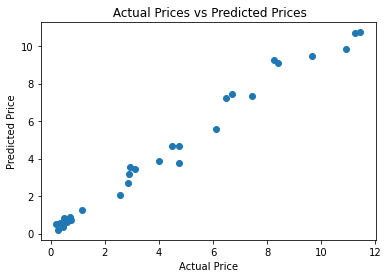

In [ ]:
plt.scatter(Y_test, test_data_prediction4)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()